In [3]:
from huggingface_hub import notebook_login
notebook_login()

In [9]:
import requests

# URL of the Bengali Bible text dataset
url = "https://raw.githubusercontent.com/BibleNLP/ebible/main/corpus/ben-ben2017.txt"

# Download the dataset
response = requests.get(url)
bengali_text = response.text

# Save the dataset to a local file
with open("bengali_text.txt", "w", encoding="utf-8") as file:
    file.write(bengali_text)


In [ ]:
import sentencepiece as spm

# Train the SentencePiece model
spm.SentencePieceTrainer.train(input='bengali_text.txt', model_prefix='bengali_sp', vocab_size=32000, model_type='bpe')


In [15]:
from transformers import AutoTokenizer, GPT2Tokenizer
import sentencepiece as spm

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# GPT-2 Tokenization
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_tokens_english = gpt2_tokenizer.tokenize(sentence_english)
gpt2_tokens_bengali = gpt2_tokenizer.tokenize(sentence_bengali)

print("GPT-2 Tokenization:")
print("English:", gpt2_tokens_english)
print("Bengali:", gpt2_tokens_bengali)

# Meta-LLaMA-3.1-8B Tokenization using AutoTokenizer
llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")
llama_tokens_english = llama_tokenizer.tokenize(sentence_english)
llama_tokens_bengali = llama_tokenizer.tokenize(sentence_bengali)

print("\nMeta-LLaMA-3.1-8B Tokenization:")
print("English:", llama_tokens_english)
print("Bengali:", llama_tokens_bengali)

# SentencePiece BPE Tokenization
sp = spm.SentencePieceProcessor(model_file='bengali_sp.model')
sp_tokens_english = sp.encode(sentence_english, out_type=str)
sp_tokens_bengali = sp.encode(sentence_bengali, out_type=str)

print("\nSentencePiece BPE Tokenization:")
print("English:", sp_tokens_english)
print("Bengali:", sp_tokens_bengali)

# sentences 
# sentence_english = "The quick brown fox jumps over the lazy dog."
# sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে


GPT-2 Tokenization:
English: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Bengali: ['à¦', 'ļ', 'à¦', '¾', 'à¦', 'ģ', 'à¦', '¦', 'à¦', '¨', 'à', '§', 'Ģ', 'Ġ', 'à¦', '°', 'à¦', '¾', 'à¦', '¤', 'à', '§', 'ĩ', 'Ġ', 'à¦', '¨', 'à¦', '¦', 'à', '§', 'Ģ', 'à¦', '°', 'Ġ', 'à¦', '§', 'à¦', '¾', 'à¦', '°', 'à', '§', 'ĩ', 'Ġ', 'à¦', '¹', 'à¦', '¾', 'à¦', 'ģ', 'à¦', 'Ł', 'à¦', '¤', 'à', '§', 'ĩ', 'Ġ', 'à¦', 'Ń', 'à¦', '¾', 'à¦', '²', 'à', '§', 'ĭ', 'Ġ', 'à¦', '²', 'à¦', '¾', 'à¦', 'Ĺ', 'à', '§', 'ĩ', 'à¥', '¤']

Meta-LLaMA-3.1-8B Tokenization:
English: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Bengali: ['à¦', 'ļ', 'à¦¾à¦', 'ģ', 'à¦', '¦', 'à¦¨', 'à§', 'Ģ', 'Ġà¦', '°', 'à¦¾à¦', '¤', 'à§ĩ', 'Ġà¦', '¨', 'à¦', '¦', 'à§', 'Ģ', 'à¦°', 'Ġà¦', '§', 'à¦¾à¦', '°', 'à§ĩ', 'Ġà¦', '¹', 'à¦¾à¦', 'ģ', 'à¦', 'Ł', 'à¦', '¤', 'à§ĩ', 'Ġà¦', 'Ń', 'à¦¾à¦', '²', 'à§', 'ĭ', 'Ġà¦', '²', 'à¦¾à¦', 'Ĺ', 'à§ĩ', 'à¥¤']

SentencePiece BPE Tokeni

In [16]:
import tiktoken

# Initialize the tiktoken encoder
tiktoken_gpt2 = tiktoken.get_encoding("gpt2")

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# Tokenize the English sentence using tiktoken
tiktoken_tokens_english = tiktoken_gpt2.encode(sentence_english)
print("Tiktoken Tokenization (English):")
print("Tokens:", tiktoken_tokens_english)
print("Decoded:", tiktoken_gpt2.decode(tiktoken_tokens_english))

# Tokenize the Bengali sentence using tiktoken
tiktoken_tokens_bengali = tiktoken_gpt2.encode(sentence_bengali)
print("\nTiktoken Tokenization (Bengali):")
print("Tokens:", tiktoken_tokens_bengali)
print("Decoded:", tiktoken_gpt2.decode(tiktoken_tokens_bengali))


Tiktoken Tokenization (English):
Tokens: [464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]
Decoded: The quick brown fox jumps over the lazy dog.

Tiktoken Tokenization (Bengali):
Tokens: [48071, 248, 48071, 122, 48071, 223, 48071, 99, 48071, 101, 156, 100, 222, 220, 48071, 108, 48071, 122, 48071, 97, 156, 100, 229, 220, 48071, 101, 48071, 99, 156, 100, 222, 48071, 108, 220, 48071, 100, 48071, 122, 48071, 108, 156, 100, 229, 220, 48071, 117, 48071, 122, 48071, 223, 48071, 253, 48071, 97, 156, 100, 229, 220, 48071, 255, 48071, 122, 48071, 110, 156, 100, 233, 220, 48071, 110, 48071, 122, 48071, 245, 156, 100, 229, 24231, 97]
Decoded: চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।


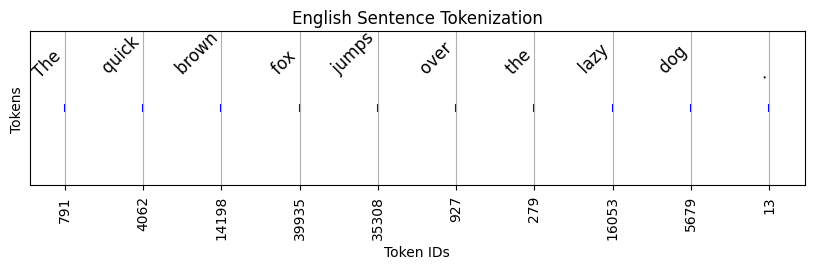

/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.

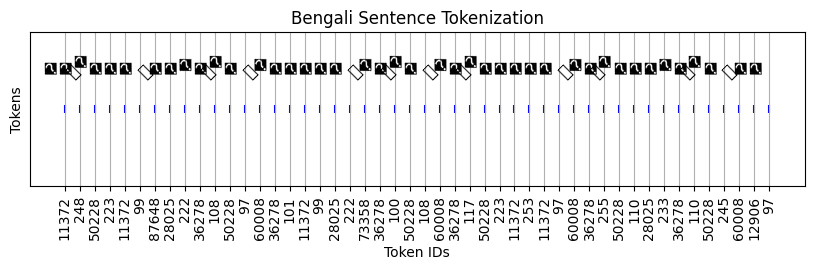

In [18]:
import tiktoken
import matplotlib.pyplot as plt

# Initialize the tiktoken encoder
enc = tiktoken.get_encoding("cl100k_base")

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# Tokenize the English sentence
tokens_english = enc.encode(sentence_english)
tokens_english_str = [enc.decode([token]) for token in tokens_english]

# Tokenize the Bengali sentence
tokens_bengali = enc.encode(sentence_bengali)
tokens_bengali_str = [enc.decode([token]) for token in tokens_bengali]

# Visualization function
def visualize_tokenization(original_sentence, tokens, tokens_str, title):
    plt.figure(figsize=(10, 2))
    plt.title(title)
    plt.scatter(range(len(tokens)), [1] * len(tokens), marker='|', color='blue')
    for i, token_str in enumerate(tokens_str):
        plt.text(i, 1.02, token_str, rotation=45, ha="right", va="bottom", fontsize=12)
    plt.yticks([])
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.xlabel("Token IDs")
    plt.ylabel("Tokens")
    plt.grid(True)
    plt.show()

# Visualize English sentence tokenization
visualize_tokenization(sentence_english, tokens_english, tokens_english_str, "English Sentence Tokenization")

# Visualize Bengali sentence tokenization
visualize_tokenization(sentence_bengali, tokens_bengali, tokens_bengali_str, "Bengali Sentence Tokenization")


In [19]:
#training tokenizer from author's code 

In [26]:
import requests

# URL of the Bengali Bible text dataset
url = "https://raw.githubusercontent.com/BibleNLP/ebible/main/corpus/ben-ben2017.txt"

# Download the dataset
response = requests.get(url)
bengali_text = response.text

# Save the dataset to a local file
with open("bengali_text.txt", "w", encoding="utf-8") as file:
    file.write(bengali_text)


In [34]:
import os
import sentencepiece as spm
from transformers import AutoTokenizer

def parse_arguments():
    return {
        "input_lang": "bn",
        "input_file": "bengali_data.txt",
        "output_path": "model/llama_tokenizer_bn"
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in Bengali
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='bn',
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,,,,,,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    tokenizer = AutoTokenizer.from_pretrained(output_path+'.model')
    tokenizer.save_pretrained(output_path+'/')

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path+".model") or not os.path.exists(output_path+".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


RuntimeError: Internal:  is already defined. duplicated symbols are not allowed.

In [35]:
import os
import sentencepiece as spm
from transformers import AutoTokenizer

def parse_arguments():
    return {
        "input_lang": "bn",
        "input_file": "bengali_data.txt",
        "output_path": "model/llama_tokenizer_bn"
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in Bengali
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='bn',
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    tokenizer = AutoTokenizer.from_pretrained(output_path+'.model')
    tokenizer.save_pretrained(output_path+'/')

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path+".model") or not os.path.exists(output_path+".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


OSError: model/llama_tokenizer_bn.model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [36]:
from transformers import LlamaTokenizerFast


In [37]:
def convert_to_hf_format(output_path):
    # Load the SentencePiece model file into LlamaTokenizerFast
    tokenizer = LlamaTokenizerFast(vocab_file=output_path + '.model')
    
    # Save it to the Hugging Face format in the specified output directory
    tokenizer.save_pretrained(output_path)


In [38]:
convert_to_hf_format("model/llama_tokenizer_bn")

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


In [39]:
from transformers import LlamaTokenizerFast

tokenizer = LlamaTokenizerFast.from_pretrained("model/llama_tokenizer_bn")


In [40]:
text = "আমি বাংলায় গান গাই"
encoded = tokenizer.encode(text)
decoded = tokenizer.decode(encoded)

print("Original Text:", text)
print("Encoded:", encoded)
print("Decoded:", decoded)


Original Text: আমি বাংলায় গান গাই
Encoded: [1, 950, 402, 31946, 1766, 1592, 5989]
Decoded: <s>আমি বাংলায় গান গাই


In [42]:
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)


Tokens: ['আমি', '▁বা', 'ং', 'লায়', '▁গান', '▁গাই']


In [43]:
# Paths to the downloaded text files
english_file_path = "eng-enggnv.txt"
bengali_file_path = "ben-ben2017.txt"
output_file_path = "merged_bengali_english.txt"

# Open the files and the output file
with open(english_file_path, 'r', encoding='utf-8') as eng_file, \
     open(bengali_file_path, 'r', encoding='utf-8') as ben_file, \
     open(output_file_path, 'w', encoding='utf-8') as out_file:

    # Read lines from both files
    eng_lines = eng_file.readlines()
    ben_lines = ben_file.readlines()

    # Determine the minimum length to avoid IndexError
    min_len = min(len(eng_lines), len(ben_lines))

    # Write lines alternately to the output file
    for i in range(min_len):
        out_file.write(eng_lines[i].strip() + "\n")
        out_file.write(ben_lines[i].strip() + "\n")

    # If one file is longer, add the remaining lines from that file
    if len(eng_lines) > min_len:
        out_file.writelines(eng_lines[min_len:])
    elif len(ben_lines) > min_len:
        out_file.writelines(ben_lines[min_len:])


In [44]:
#training the english-bengali tokenizer 

In [46]:
import os
import sentencepiece as spm
from transformers import LlamaTokenizerFast

def parse_arguments():
    return {
        "input_lang": "bn,en",  # Specify both Bengali and English
        "input_file": "merged_bengali_english.txt",  # Your combined text file
        "output_path": "en_bn/llama_tokenizer_bn_en"  # Output path for the trained tokenizer
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in both Bengali and English
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='en,bn',  # Accept both English and Bengali
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    # Load the SentencePiece model file into LlamaTokenizerFast
    tokenizer = LlamaTokenizerFast(vocab_file=output_path + '.model')
    
    # Save it to the Hugging Face format in the specified output directory
    tokenizer.save_pretrained(output_path)

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path + ".model") or not os.path.exists(output_path + ".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


In [47]:
# Example texts
english_text = "In the beginning God created the heavens and the earth."
bengali_text = "আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।"

# Load the tokenizer
tokenizer = LlamaTokenizerFast.from_pretrained("en_bn/llama_tokenizer_bn_en")

# Tokenization for English
english_tokens = tokenizer.tokenize(english_text)
english_encoded = tokenizer.encode(english_text)
decoded_english = tokenizer.decode(english_encoded)

# Tokenization for Bengali
bengali_tokens = tokenizer.tokenize(bengali_text)
bengali_encoded = tokenizer.encode(bengali_text)
decoded_bengali = tokenizer.decode(bengali_encoded)

# Print the results
print("Original English Text:", english_text)
print("English Tokens:", english_tokens)
print("English Encoded:", english_encoded)
print("Decoded English:", decoded_english)

print("\nOriginal Bengali Text:", bengali_text)
print("Bengali Tokens:", bengali_tokens)
print("Bengali Encoded:", bengali_encoded)
print("Decoded Bengali:", decoded_bengali)


Original English Text: In the beginning God created the heavens and the earth.
English Tokens: ['I', 'n', '▁the', '▁beginning', '▁God', '▁created', '▁the', '▁he', 'av', 'ens', '▁and', '▁the', '▁earth', '.']
English Encoded: [1, 31921, 31873, 287, 3906, 523, 6878, 287, 354, 5795, 5482, 303, 287, 1052, 31913]
Decoded English: <s>In the beginning God created the heavens and the earth.

Original Bengali Text: আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।
Bengali Tokens: ['আ', 'দি', 'তে', '▁ঈশ্বর', '▁আকাশমণ্ডল', '▁ও', '▁পৃথিবীর', '▁সৃষ্টি', '▁করলেন', '।']
Bengali Encoded: [1, 31902, 583, 361, 530, 7166, 369, 1925, 2885, 709, 31910]
Decoded Bengali: <s>আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।


In [54]:
#creating aligned corpus 

In [56]:
from pathlib import Path
from transformers import LlamaTokenizerFast
import os
import regex as re
from tqdm import tqdm

# Define paths and settings
home_path = Path("transtokenizers")
source_language = "en"
target_language = "bn"
source_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Path to your English tokenizer
target_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Path to your Bengali tokenizer

# Load the tokenizers
old_tokenizer = LlamaTokenizerFast.from_pretrained(source_tokenizer)
new_tokenizer = LlamaTokenizerFast.from_pretrained(target_tokenizer)

# Define prefixes for tokenizers (for handling special cases)
OLD_TOKENIZER_1ST_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
NEW_TOKENIZER_1ST_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
OLD_TOKENIZER_2ND_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')
NEW_TOKENIZER_2ND_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')

# Define the output path
out_path = f'{home_path}/aligned_corpus.moses'

# Open the parallel corpus and the output file
with open("cleaned_parallel_corpus.txt", 'r', encoding='utf-8') as infile, open(out_path, 'w', encoding='utf-8') as outfile:
    for line in tqdm(infile):
        if '|||' in line:
            line_source, line_target = line.strip().split(' ||| ')
            
            # Tokenize and merge tokens for both languages
            line1 = re.sub(
                r'(?!'
                + OLD_TOKENIZER_1ST_PREFIX
                + r')(\p{L})[ ](?!'
                + OLD_TOKENIZER_1ST_PREFIX
                + r')(?='
                + OLD_TOKENIZER_2ND_PREFIX
                + r'\p{L})',
                r'\1—',
                ' '.join(old_tokenizer.tokenize(line_source.strip())),
            )
            line2 = re.sub(
                r'(?!'
                + NEW_TOKENIZER_1ST_PREFIX
                + r')(\p{L})[ ](?!'
                + NEW_TOKENIZER_1ST_PREFIX
                + r')(?='
                + NEW_TOKENIZER_2ND_PREFIX
                + r'\p{L})',
                r'\1—',
                ' '.join(new_tokenizer.tokenize(line_target.strip())),
            )

            # Write the tokenized and aligned lines to the output file
            outfile.write(line1.strip() + ' ||| ' + line2.strip() + '\n')

print(f"Aligned corpus created at: {out_path}")


31082it [00:09, 3374.09it/s]

Aligned corpus created at: transtokenizers/aligned_corpus.moses


In [57]:
#align corpus 

In [60]:
import os

def align_corpus(corpus_path, fast_align_path, output_dir):
    output_path = os.path.join(output_dir, os.path.basename(corpus_path).replace(".moses", ".fast_align.tsv"))

    if os.path.exists(output_path):
        print(f"Corpus already aligned: {output_path}")
    else:
        # Run FastAlign
        command = f"{fast_align_path} -i {corpus_path} -d -o -v > {output_path}"
        os.system(command)
    
    return output_path

# Define paths
corpus_path = "transtokenizers/aligned_corpus.moses"  # Path to your Moses-style file
fast_align_path = "fast_align/build/fast_align"       # Path to the FastAlign executable
output_dir = "transtokenizers"             # Directory to save the aligned corpus

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Run the alignment
aligned_corpus_path = align_corpus(corpus_path, fast_align_path, output_dir)
print(f"Aligned tokens saved at: {aligned_corpus_path}")


ARG=i
ARG=d
ARG=o
ARG=v
INITIAL PASS 
...............................
expected target length = source length * 0.882725
ITERATION 1
...............................
  log_e likelihood: -1.59083e+07
  log_2 likelihood: -2.29509e+07
     cross entropy: 29.8974
        perplexity: 1e+09
      posterior p0: 0.08
 posterior al-feat: -0.166292
       size counts: 2055
ITERATION 2
...............................
  log_e likelihood: -5.33419e+06
  log_2 likelihood: -7.69561e+06
     cross entropy: 10.0248
        perplexity: 1041.77
      posterior p0: 0.0836081
 posterior al-feat: -0.142298
       size counts: 2055
  1  model al-feat: -0.201778 (tension=4)
  2  model al-feat: -0.170798 (tension=5.1896)
  3  model al-feat: -0.158652 (tension=5.75962)
  4  model al-feat: -0.152343 (tension=6.08669)
  5  model al-feat: -0.148684 (tension=6.28758)
  6  model al-feat: -0.146439 (tension=6.41531)
  7  model al-feat: -0.145016 (tension=6.49814)
  8  model al-feat: -0.144095 (tension=6.55251)
     fin

Aligned tokens saved at: transtokenizers/aligned_corpus.fast_align.tsv


In [63]:
import transformers
import os
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm

def add_token_pair(count, new_token, old_token):
        tokenized_possible_translations[new_token][old_token] += count

def add_word_pair(count, new_word, old_word, all_to_all_mapping, tokenized_possible_translations):
    old_word_tokenized = old_word.split('—')
    new_word_tokenized = new_word.split('—')

    if all_to_all_mapping:
        count_dilution = len(old_word_tokenized)
        old_word_tokenized = np.tile(old_word_tokenized, len(new_word_tokenized))
        new_word_tokenized = np.repeat(new_word_tokenized, count_dilution)
    elif len(old_word_tokenized) != len(new_word_tokenized):
        gcd = math.gcd(len(old_word_tokenized), len(new_word_tokenized))
        count_dilution = len(old_word_tokenized) // gcd
        old_word_tokenized = np.repeat(old_word_tokenized, len(new_word_tokenized) // gcd)
        new_word_tokenized = np.repeat(new_word_tokenized, count_dilution)
    else:
        gcd = 1
        count_dilution = 1

    for token_old, token_new in zip(old_word_tokenized, new_word_tokenized):
        tokenized_possible_translations[token_new][token_old] += max(1, count // count_dilution)

source_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Update this with your path
target_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Update this with your path

old_tokenizer = transformers.AutoTokenizer.from_pretrained(source_tokenizer)
new_tokenizer = transformers.AutoTokenizer.from_pretrained(target_tokenizer)

old_tokenizer_vocab = set(old_tokenizer.vocab.keys())
new_tokenizer_vocab = set(new_tokenizer.vocab.keys())

tokenized_possible_translations = defaultdict(lambda: defaultdict(int))
untokenized_possible_translations = defaultdict(lambda: defaultdict(int))

# Set prefixes for special handling
OLD_TOKENIZER_1ST_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
NEW_TOKENIZER_1ST_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
OLD_TOKENIZER_2ND_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')
NEW_TOKENIZER_2ND_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')


mapped_tokens_file = "transtokenizers/aligned_corpus.fast_align.tsv"  # Update this with your path
MIN_COUNT_REQUIRED_FOR_CONSIDERATION = 10  # You can adjust this threshold based on your data

total_alignments = sum(1 for _ in open(mapped_tokens_file))

with open(mapped_tokens_file) as f:
    for line in tqdm(f, total=total_alignments):
        line = line.rstrip('\n')
        if line == '':
            continue
        
        parts = line.split('\t')
        if len(parts) != 4:
            continue
        old_word, new_word, log_prob, count = parts

        if old_word == '<eps>' or new_word == '<eps>':
            continue
        
        count = int(float(count))
        if count < MIN_COUNT_REQUIRED_FOR_CONSIDERATION:
            continue
        
        if (new_word in new_tokenizer_vocab) and (old_word in old_tokenizer_vocab):
            add_token_pair(count, new_word, old_word, tokenized_possible_translations)
        else:
            half_count = max(1, count // 2)
            add_word_pair(half_count, new_word, old_word, all_to_all_mapping=True, tokenized_possible_translations=tokenized_possible_translations)
            add_word_pair(half_count, new_word, old_word, all_to_all_mapping=False, tokenized_possible_translations=tokenized_possible_translations)
        
        untokenized_possible_translations[new_word][old_word] += count

def or_old_unk_token(token, fallback_token=None):
    if (token is not None) and (token in old_tokenizer_vocab):
        return token
    if (fallback_token is not None) and (fallback_token in old_tokenizer_vocab):
        return fallback_token
    return old_tokenizer.unk_token

very_large_number = 1_000_000_000
if new_tokenizer.pad_token is not None:
    add_token_pair(very_large_number, new_tokenizer.pad_token, or_old_unk_token(old_tokenizer.pad_token))
if new_tokenizer.unk_token is not None:
    add_token_pair(very_large_number, new_tokenizer.unk_token, or_old_unk_token(old_tokenizer.unk_token))
if new_tokenizer.bos_token is not None:
    add_token_pair(very_large_number, new_tokenizer.bos_token, or_old_unk_token(old_tokenizer.bos_token, old_tokenizer.cls_token))
if new_tokenizer.eos_token is not None:
    add_token_pair(very_large_number, new_tokenizer.eos_token, or_old_unk_token(old_tokenizer.eos_token, old_tokenizer.sep_token))
if new_tokenizer.cls_token is not None:
    add_token_pair(very_large_number, new_tokenizer.cls_token, or_old_unk_token(old_tokenizer.cls_token, old_tokenizer.bos_token))
if new_tokenizer.sep_token is not None:
    add_token_pair(very_large_number, new_tokenizer.sep_token, or_old_unk_token(old_tokenizer.sep_token, old_tokenizer.eos_token))
if new_tokenizer.mask_token is not None:
    add_token_pair(very_large_number, new_tokenizer.mask_token, or_old_unk_token(old_tokenizer.mask_token, old_tokenizer.pad_token))


print(f'Number of tokens with a translation: {len(tokenized_possible_translations)}')
print(f'Number of new tokens: {len(new_tokenizer)}')
print(f'Percentage of tokens with a translation: {int(len(tokenized_possible_translations) / len(new_tokenizer) * 1000)/10}%')


100%|██████████| 31082/31082 [00:00<00:00, 1392888.05it/s]

Number of tokens with a translation: 3
Number of new tokens: 32000
Percentage of tokens with a translation: 0.0%


In [ ]:
import transformers
import os
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm

def add_token_pair(count, new_token, old_token):
    tokenized_possible_translations[new_token][old_token] += count

def process_alignment_line(line, source_tokens, target_tokens, tokenized_possible_translations):
    pairs = line.strip().split()
    for pair in pairs:
        i, j = map(int, pair.split('-'))
        source_token = source_tokens[i]
        target_token = target_tokens[j]
        add_token_pair(1, target_token, source_token)

source_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Update this with your path
target_tokenizer = "en_bn/llama_tokenizer_bn_en"  # Update this with your path

old_tokenizer = transformers.AutoTokenizer.from_pretrained(source_tokenizer)
new_tokenizer = transformers.AutoTokenizer.from_pretrained(target_tokenizer)

tokenized_possible_translations = defaultdict(lambda: defaultdict(int))

# Load your aligned sentences
source_sentences = [...]  # Load or create your list of source sentences
target_sentences = [...]  # Load or create your list of target sentences

mapped_tokens_file = "transtokenizers/aligned_corpus.fast_align.tsv"  # Update this with your path

with open(mapped_tokens_file) as f:
    for idx, line in enumerate(tqdm(f)):
        source_tokens = old_tokenizer.tokenize(source_sentences[idx])
        target_tokens = new_tokenizer.tokenize(target_sentences[idx])
        process_alignment_line(line, source_tokens, target_tokens, tokenized_possible_translations)

# Continue with your logic to handle special tokens
def or_old_unk_token(token, fallback_token=None):
    if (token is not None) and (token in old_tokenizer_vocab):
        return token
    if (fallback_token is not None) and (fallback_token in old_tokenizer_vocab):
        return fallback_token
    return old_tokenizer.unk_token

# Add mappings for special tokens as in your original script...
# You can add the existing special token mapping logic here
# ...

print(f'Number of tokens with a translation: {len(tokenized_possible_translations)}')
print(f'Number of new tokens: {len(new_tokenizer)}')
print(f'Percentage of tokens with a translation: {int(len(tokenized_possible_translations) / len(new_tokenizer) * 1000)/10}%')
